# Housing Price Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Housing.csv")

# EDA

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
# To check is there any null value in dataset

df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


<Axes: xlabel='price', ylabel='Count'>

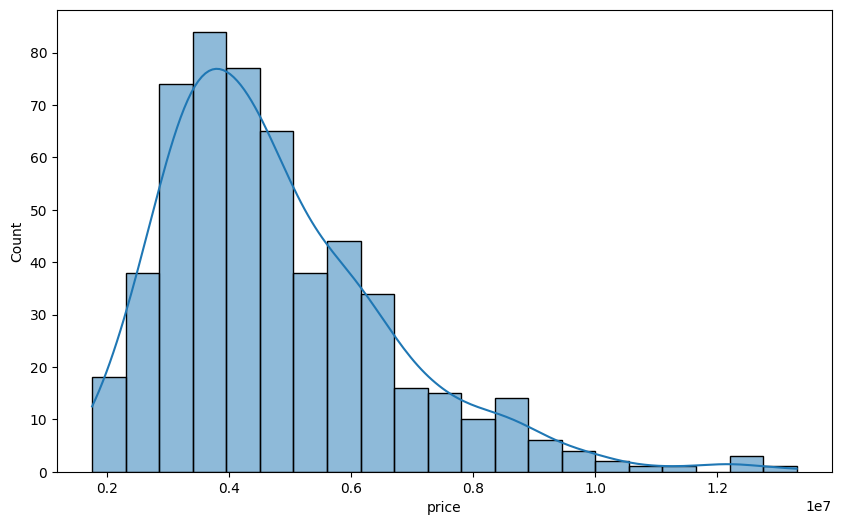

In [7]:
# Histogram plot gives us count of that perticular range
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='price',kde=True)

C:\Users\khara\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


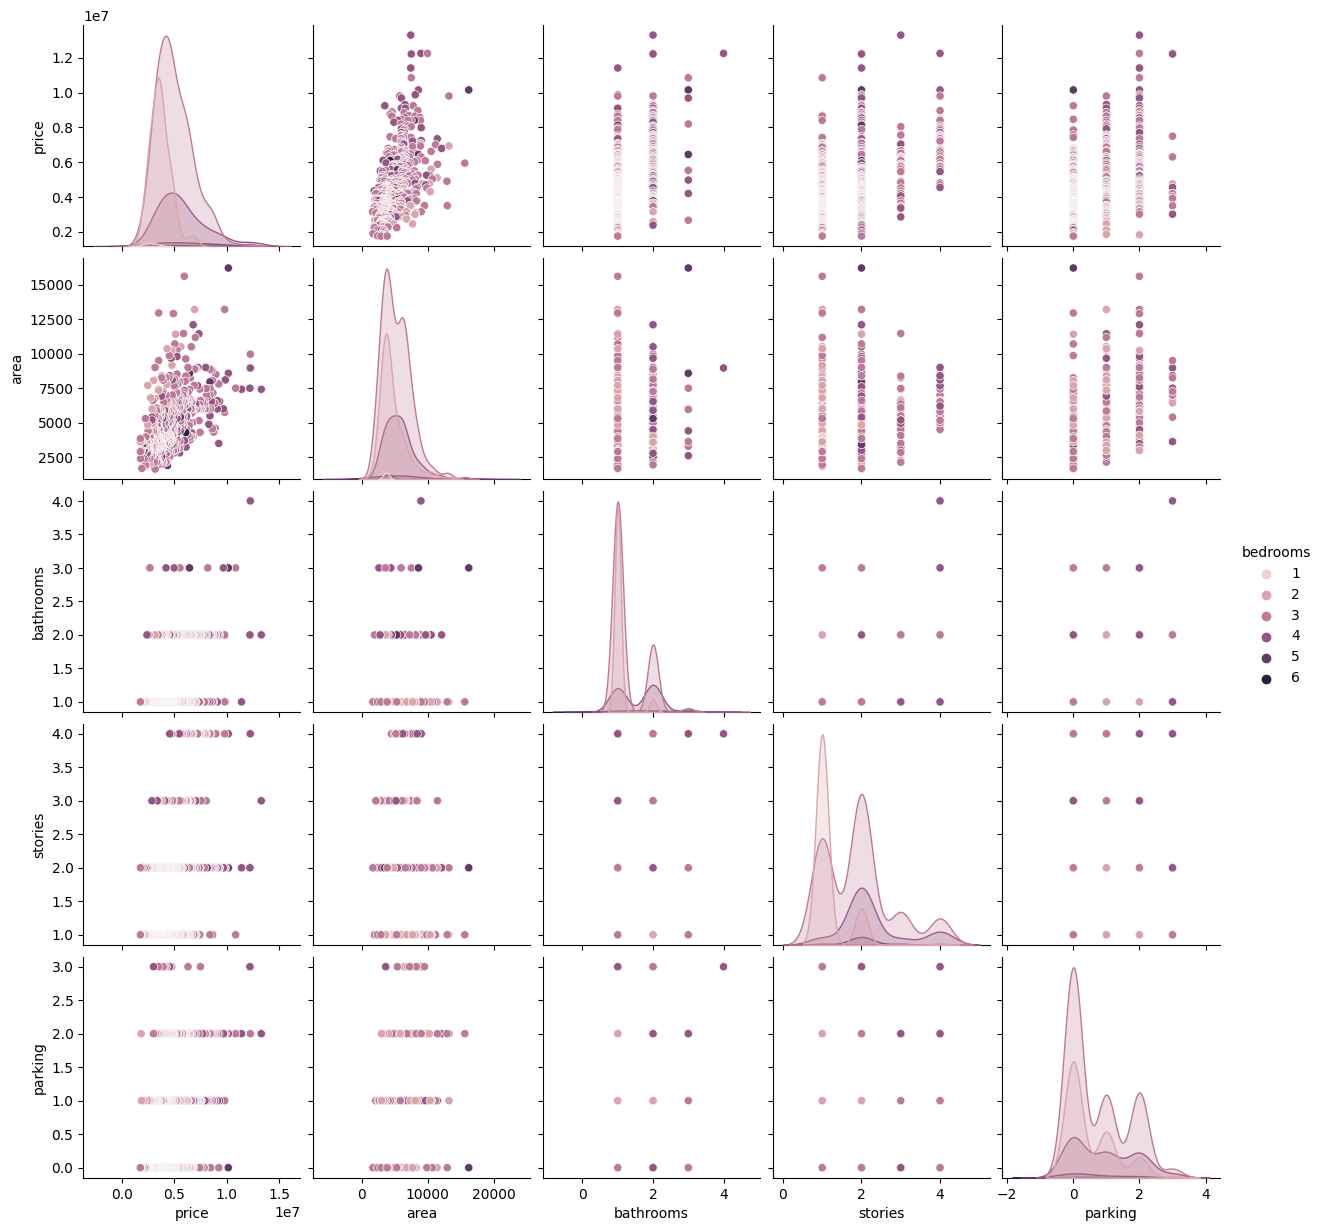

In [8]:
sns.pairplot(data=df,hue='bedrooms')

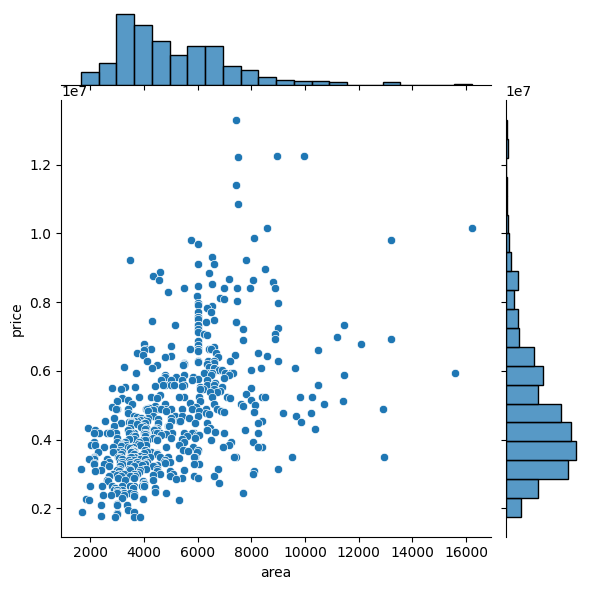

In [9]:
sns.jointplot(x=df['area'],y=df['price'])

<Axes: xlabel='bedrooms', ylabel='count'>

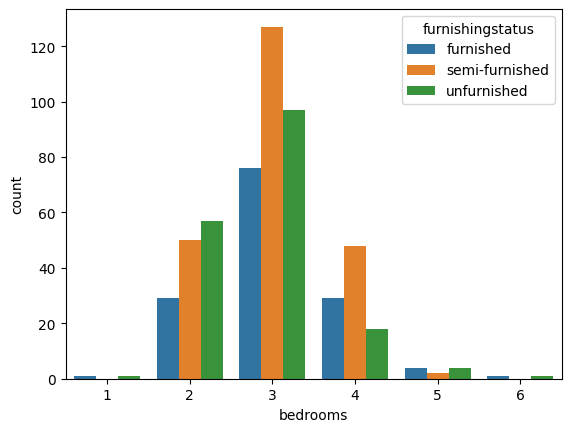

In [10]:
sns.countplot(x=df['bedrooms'],hue=df['furnishingstatus'])

<Axes: xlabel='parking', ylabel='count'>

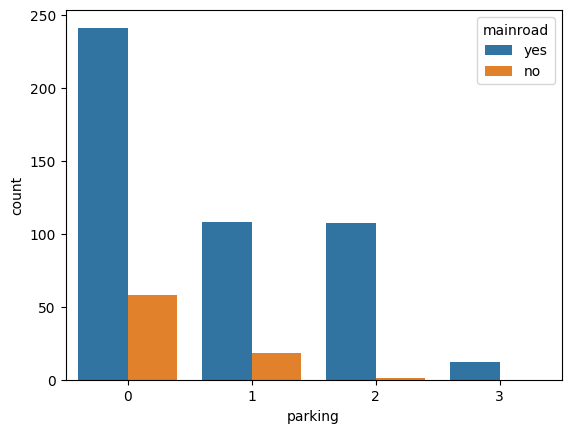

In [11]:
sns.countplot(x=df['parking'],hue=df['mainroad'])

# convert object data into numeric useing LabelEncoder

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
df[['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']]=df[['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']].apply(LabelEncoder().fit_transform)

In [14]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [15]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,1.069725
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


In [16]:
# To check the corrilation betweeen columns
df.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,-0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,-0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,-0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,-0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.104672
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,-0.156726
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,-0.118328
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,-0.112831
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.031628
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.150477


<Axes: xlabel='area', ylabel='price'>

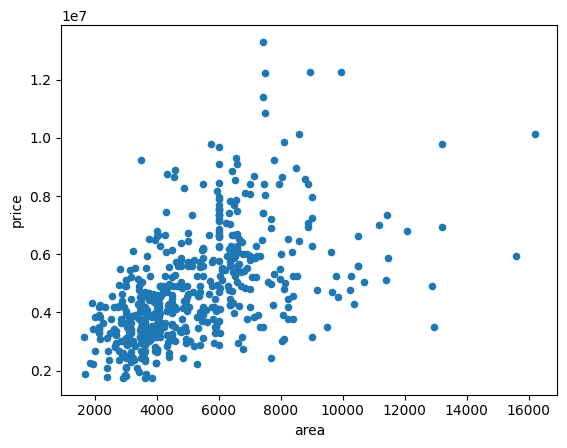

In [17]:
df.plot(kind='scatter',x='area',y='price')

# To check Outliers

C:\Users\khara\AppData\Local\Temp\ipykernel_12024\444587821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

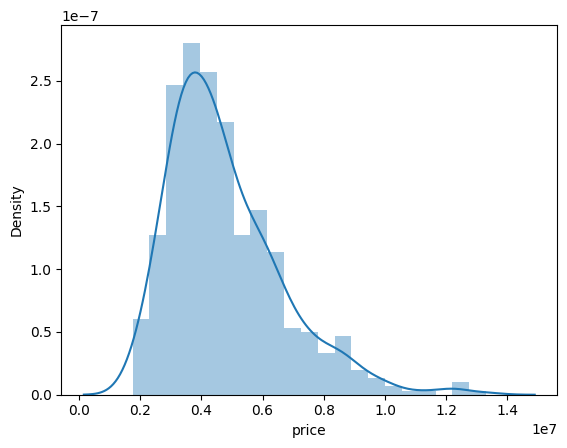

In [18]:
sns.distplot(df['price'])

In [19]:
# Make the copy of dataset and do operation for outliers
data=df.copy()

C:\Users\khara\AppData\Local\Temp\ipykernel_12024\2464980770.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['area'])


<Axes: xlabel='area', ylabel='Density'>

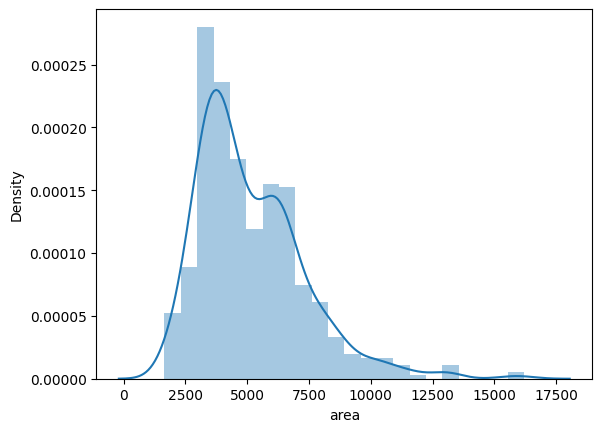

In [20]:
sns.distplot(data['area'])

# Z_Score method
    1. Trim method
    2. Cap method

In [21]:
# Creat a function to find ouliers and make a canges accordingly
def outliers(data,col):
    for i in col:
        Higher_limit = data[i].mean() + 3 * data[i].std()
        Lower_limit = data[i].mean() - 3 * data[i].std()

        print(Higher_limit, Lower_limit)

       # data_trim = data[(df['price'] < Higher_limit) & (data['price'] > Lower_limit)]   #----- Trim method
        data[i] = np.where(data[i] > Higher_limit, Higher_limit , np.where(data[i] < Lower_limit , Lower_limit , data[i])) #---Cap method
    return data

In [22]:
# Call the function
outliers(data,['price','area'])

10378048.0946786 -844589.5992657552
11660.964351930079 -1359.8817831227389


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.037805e+07,7420.0,4,2,3,1,0,0,0,1,2,1,0
1,1.037805e+07,8960.0,4,4,4,1,0,0,0,1,3,0,0
2,1.037805e+07,9960.0,3,2,2,1,0,1,0,0,2,1,1
3,1.037805e+07,7500.0,4,2,2,1,0,1,0,1,3,1,0
4,1.037805e+07,7420.0,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1.820000e+06,3000.0,2,1,1,1,0,1,0,0,2,0,2
541,1.767150e+06,2400.0,3,1,1,0,0,0,0,0,0,0,1
542,1.750000e+06,3620.0,2,1,1,1,0,0,0,0,0,0,2
543,1.750000e+06,2910.0,3,1,1,0,0,0,0,0,0,0,0


{'whiskers': [<matplotlib.lines.Line2D at 0x29368b435d0>,
 'caps': [<matplotlib.lines.Line2D at 0x29368b4c8d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x29368b42bd0>],
 'medians': [<matplotlib.lines.Line2D at 0x29368a51f90>],
 'fliers': [<matplotlib.lines.Line2D at 0x29368ad1d50>],
 'means': []}

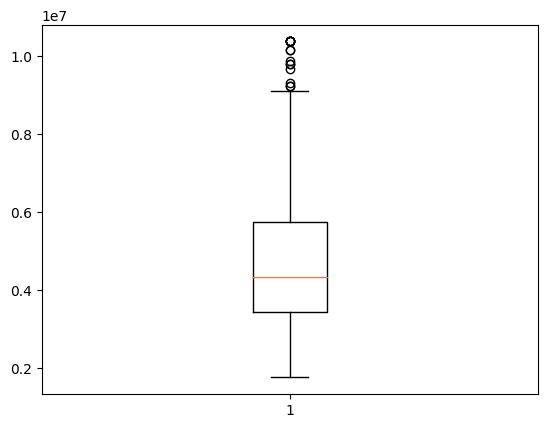

In [23]:
# After removing the outliers
plt.boxplot(data['price'])

C:\Users\khara\AppData\Local\Temp\ipykernel_12024\3068199080.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'])


<Axes: xlabel='price', ylabel='Density'>

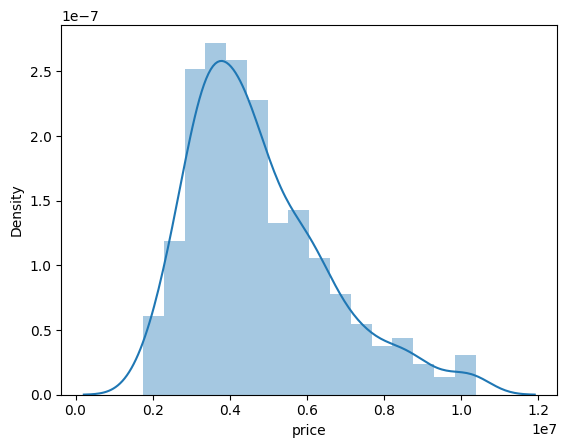

In [24]:
# After removing the outliers
sns.distplot(data['price'])

In [25]:
data.shape

(545, 13)

# Now split the data by dependent and independent features

In [26]:
X=data.drop('price',axis=1)
Y=data['price']

# Split the data into Train data and Test data

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=42)

In [29]:
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
126,7160.0,3,1,1,1,0,1,0,0,2,1,2
363,3584.0,2,1,1,1,0,0,1,0,0,0,1
370,4280.0,2,1,1,1,0,0,0,1,2,0,1
31,7000.0,3,1,4,1,0,0,0,1,2,0,1
113,9620.0,3,1,1,1,0,1,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
71,6000.0,4,2,4,1,0,0,0,1,0,0,2
106,5450.0,4,2,1,1,0,1,0,1,0,1,1
270,4500.0,3,2,3,1,0,0,1,0,1,0,0
435,4040.0,2,1,1,1,0,0,0,0,0,0,2


# Create the model

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
model=LinearRegression()

In [32]:
model.fit(X_train,Y_train)

LinearRegression()

In [33]:
pred = model.predict(X_test)

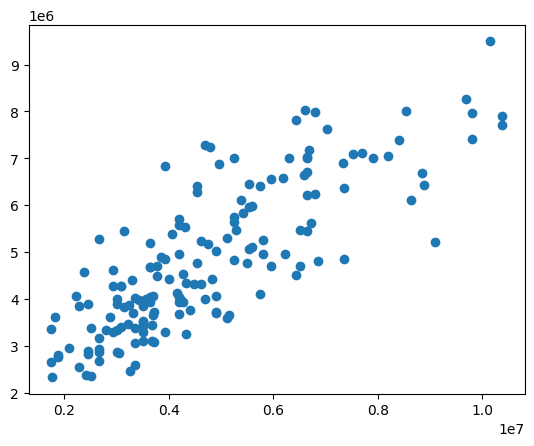

In [34]:
plt.scatter(Y_test,pred)


<Axes: xlabel='price'>

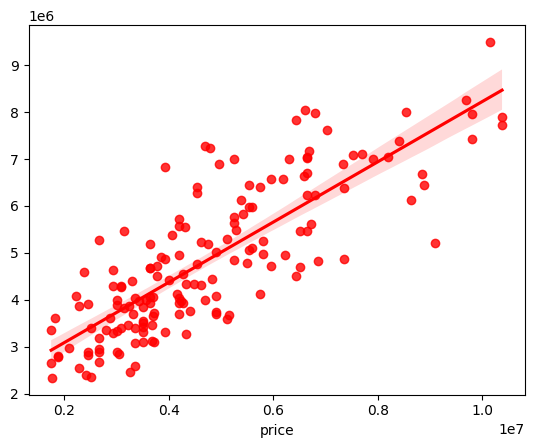

In [35]:
# Here we see how our model creat best fit line with given data
sns.regplot(x=Y_test,y=pred,color ='red')

In [36]:
pred_df=pd.DataFrame({'Actual Value':Y_test,'Predicted Value':pred,'Difference':Y_test-pred})

In [37]:
pred_df

,Actual Value,Predicted Value,Difference
316,4060000.0,5.383828e+06,-1.323828e+06
77,6650000.0,7.033545e+06,-3.835448e+05
360,3710000.0,3.089089e+06,6.209111e+05
90,6440000.0,4.506638e+06,1.933362e+06
493,2800000.0,3.345535e+06,-5.455346e+05
...,...,...,...
395,3500000.0,3.842901e+06,-3.429014e+05
425,3360000.0,4.029657e+06,-6.696568e+05
195,4970000.0,6.888692e+06,-1.918692e+06
452,3150000.0,5.455664e+06,-2.305664e+06


In [38]:
from sklearn.metrics import r2_score
r2_score(Y_test, pred)

0.6618407830501164

In [39]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,accuracy_score

In [40]:
MSE=mean_squared_error(Y_test,pred)
print("Mean Square Error :-",MSE)

Mean Square Error :- 1320392284431.2825


In [41]:
MAE=mean_absolute_error(Y_test,pred)
print("Mean Absolute Error :-",MAE)

Mean Absolute Error :- 892271.0138989263


In [42]:
RMSE=np.sqrt(mean_squared_error(Y_test,pred))
print("Root Mean Square Error :-",RMSE)

Root Mean Square Error :- 1149083.2365112992


# Without removing the outliers


In [43]:
x=df.drop('price',axis=1)
y=df['price']

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [45]:
model_2=LinearRegression()

In [46]:
model_2.fit(x_train,y_train)

LinearRegression()

In [47]:
predict=model_2.predict(x_test)

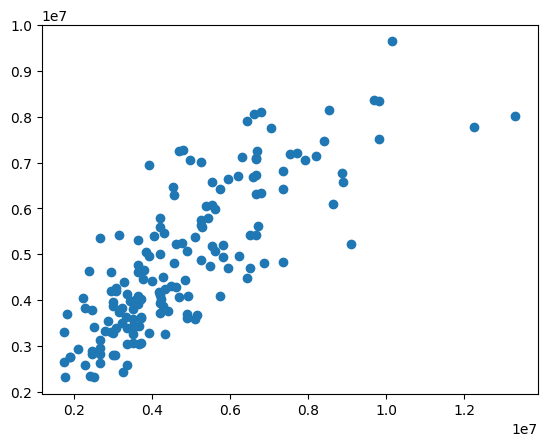

In [48]:
plt.scatter(y_test,predict)

<Axes: xlabel='price'>

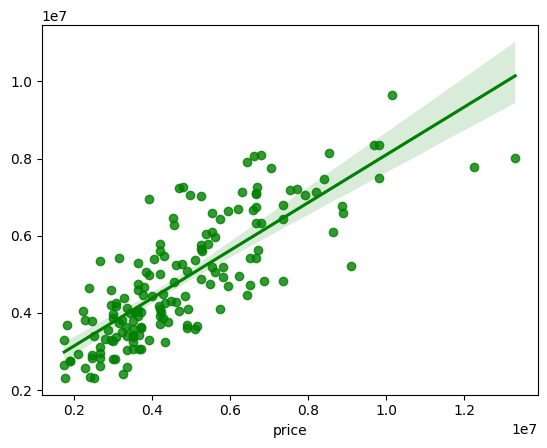

In [49]:
sns.regplot(x=y_test,y=predict,color='g')

In [50]:
from sklearn.metrics import r2_score
r2_score(y_test, predict)

0.6435419628959107

As above we see without removing the outliers we calculate the score we get 2% less accuracy compare to removing outliers

In [51]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [52]:
MSE_2=mean_squared_error(y_test,predict)
print("Mean Square Error with outliers:-",MSE_2)
print("Mean Square Error without outliers:-",MSE)

Mean Square Error with outliers:- 1535047758428.0498
Mean Square Error without outliers:- 1320392284431.2825


In [53]:
MAE_2=mean_absolute_error(y_test,predict)
print("Mean Square Error :-",MAE_2)

Mean Square Error :- 925543.548315656


In [54]:
RMSE_2=np.sqrt(mean_squared_error(y_test,predict))
print("Mean Square Error :-",RMSE_2)

Mean Square Error :- 1238970.4429194627


# Ridge Regression (L2 Regularization)

In [55]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [56]:
ridge_reg = Ridge()
parameters ={'alpha': [1,0.1,10,0.01,20,2,3,30,50,60]}
ridg_cv = GridSearchCV(ridge_reg, parameters, scoring='neg_mean_squared_error',cv=5 )

In [57]:
ridg_cv.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 0.1, 10, 0.01, 20, 2, 3, 30, 50, 60]},
             scoring='neg_mean_squared_error')

In [58]:
print(ridg_cv.best_params_)

{'alpha': 10}


In [59]:
print(ridg_cv.best_score_)

-1028637377171.7207


In [60]:
pred_CV=ridg_cv.predict(X_test)

In [61]:
ridg_cv.score(X_test,Y_test)

-1351535781218.491

In [62]:
r2_score(Y_test, pred_CV)

0.6538647742451424

<Axes: xlabel='price'>

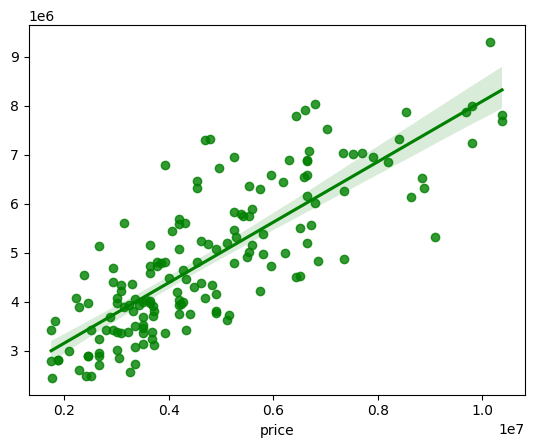

In [63]:
sns.regplot(x=Y_test,y=pred_CV,color='g')